<a href="https://colab.research.google.com/github/Shayankr/Object_Recognition/blob/master/RCNN_Custom_Object_Detection_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <center>RCNN Based Object Recognition</center>

https://tensorflow-object-detection-api-tutorial.readthedocs.io/en/latest/install.html

In [1]:
!pip install tensorflow-gpu

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 588.3 MB 22 kB/s 
     |████████████████████████████████| 6.0 MB 10.5 MB/s 
     |████████████████████████████████| 1.7 MB 40.5 MB/s 
     |████████████████████████████████| 439 kB 44.7 MB/s 
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.9.0
    Uninstalling tensorflow-estimator-2.9.0:
      Successfully uninstalled tensorflow-estimator-2.9.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.9.1
    Uninstalling tensorboard-2.9.1:
      Successfully uninstalled tensorboard-2.9.1
  Attempting uninstall: keras
    Found existing installation: keras 2.9.0
    Uninstalling keras-2.9.0:
      Successfully uninstalled keras-2.9.0
  Attempting uninstall: flatbuffers
    Found existing installation: flatbuffers 1.12
    Uninstalling flatbuffers-1.12:
      Successfully u

In [2]:
import tensorflow as tf
print(tf.__version__)

2.11.0


## **Cloning TFOD 2.0 Github**

Downloading the TensorFlow Model Garden

In [3]:
# HTTPS : https://github.com/tensorflow/models.git

In [4]:
# URL: https://github.com/tensorflow/models

In [5]:
!git clone https://github.com/tensorflow/models.git

Cloning into 'models'...
remote: Enumerating objects: 79788, done.
remote: Counting objects: 100% (494/494), done.
remote: Compressing objects: 100% (280/280), done.
remote: Total 79788 (delta 275), reused 404 (delta 210), pack-reused 79294
Receiving objects: 100% (79788/79788), 594.16 MiB | 31.95 MiB/s, done.
Resolving deltas: 100% (56727/56727), done.


In [6]:
# check current working directory
!pwd

/content


TensorFlow/

    └─ models/

       ├─ community/

       ├─ official/

       ├─ orbit/

       ├─ research/

       └── ...

**Protobuf Installation/Compilation**

**The Tensorflow Object Detection API uses Protobufs to configure model and training parameters. Before the framework can be used, the Protobuf libraries must be downloaded and compiled**

In [7]:
cd /content/models/research

/content/models/research


In [8]:
!pwd

/content/models/research


In [9]:
!protoc object_detection/protos/*.proto --python_out=.

**COCO API installation**

As of TensorFlow 2.x, the pycocotools package is listed as a dependency of the Object Detection API. Ideally, this package should get installed when installing the Object Detection API as documented in the Install the Object Detection API section below, however the installation can fail for various reasons and therefore it is simpler to just install the package beforehand, in which case later installation will be skipped.

**Note**

* **The default metrics are based on those used in Pascal VOC evaluation.**

  * **To use the COCO object detection metrics add metrics_set: "coco_detection_metrics" to the eval_config message in the config file.**

  * **To use the COCO instance segmentation metrics add metrics_set: "coco_mask_metrics" to the eval_config message in the config file**.

In [10]:
!git clone https://github.com/cocodataset/cocoapi.git


Cloning into 'cocoapi'...
remote: Enumerating objects: 975, done.
remote: Total 975 (delta 0), reused 0 (delta 0), pack-reused 975
Receiving objects: 100% (975/975), 11.72 MiB | 28.12 MiB/s, done.
Resolving deltas: 100% (576/576), done.


In [11]:
cd cocoapi/PythonAPI

/content/models/research/cocoapi/PythonAPI


**Linux**
* Download cocoapi to a directory of your choice, then make and copy the pycocotools subfolder to the Tensorflow/models/research directory, as such:

* git clone https://github.com/cocodataset/cocoapi.git
* cd cocoapi/PythonAPI
* make
* cp -r pycocotools <PATH_TO_TF>/TensorFlow/models/research/

In [12]:
!make #for compilation purpose

python setup.py build_ext --inplace
running build_ext
cythoning pycocotools/_mask.pyx to pycocotools/_mask.c
/usr/local/lib/python3.8/dist-packages/Cython/Compiler/Main.py:369: FutureWarning: Cython directive 'language_level' not set, using 2 for now (Py2). This will change in a later release! File: /content/models/research/cocoapi/PythonAPI/pycocotools/_mask.pyx
  tree = Parsing.p_module(s, pxd, full_module_name)
building 'pycocotools._mask' extension
creating build
creating build/common
creating build/temp.linux-x86_64-3.8
creating build/temp.linux-x86_64-3.8/pycocotools
x86_64-linux-gnu-gcc -pthread -Wno-unused-result -Wsign-compare -DNDEBUG -g -fwrapv -O2 -Wall -g -fstack-protector-strong -Wformat -Werror=format-security -g -fwrapv -O2 -g -fstack-protector-strong -Wformat -Werror=format-security -Wdate-time -D_FORTIFY_SOURCE=2 -fPIC -I/usr/local/lib/python3.8/dist-packages/numpy/core/include -I../common -I/usr/include/python3.8 -c ../common/maskApi.c -o build/temp.linux-x86_64-3.8/

In [13]:
# cp -r pycocotools <PATH_TO_TF>/TensorFlow/models/research/

In [14]:
cp -r pycocotools /content/models/research

### **Install the Object Detection API**

In [15]:
!pwd

/content/models/research/cocoapi/PythonAPI


In [16]:
cd ..

/content/models/research/cocoapi


In [20]:
cd ..

/content/models/research


In [21]:
# Now under "research" directory

In [22]:
!pwd

/content/models/research


In [23]:
cp object_detection/packages/tf2/setup.py .

In [24]:
!python -m pip install .

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Processing /content/models/research
  DEPRECATION: A future pip version will change local packages to be built in-place without first copying to a temporary directory. We recommend you use --use-feature=in-tree-build to test your packages with this new behavior before it becomes the default.
   pip 21.3 will remove support for this functionality. You can find discussion regarding this at https://github.com/pypa/pip/issues/7555.
     |████████████████████████████████| 14.5 MB 66 kB/s 
     |████████████████████████████████| 352 kB 78.2 MB/s 
     |████████████████████████████████| 2.4 MB 69.3 MB/s 
     |████████████████████████████████| 26.9 MB 1.2 MB/s 
     |████████████████████████████████| 67 kB 7.5 MB/s 
     |████████████████████████████████| 116 kB 77.4 MB/s 
     |████████████████████████████████| 662 kB 76.6 MB/s 
     |████████████████████████████████| 1.3 MB 70.5 MB/s 
     |██

**Test your installation**

In [25]:
# From within TensorFlow/models/research/
!python object_detection/builders/model_builder_tf2_test.py

2022-12-16 09:12:32.036189: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib64-nvidia
2022-12-16 09:12:32.036429: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib64-nvidia
2022-12-16 09:12:32.036462: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nvidia GPU with TensorRT, please make sure the missing libraries mentioned above are installed properly.
Running tests under Python 3.8.16: /usr/bin/python3
[ RUN      ] ModelBuilderTF2Test.test_create_center_net_deepmac
2022-12-16 09:12:39.255145: W tensorflow/core/commo

### **Try out the examples**

If the previous step completed successfully it means you have successfully installed all the components necessary to perform object detection using pre-trained models.

## <b>Training Custom Object Detector</b>

In [26]:
#import some files

In [27]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [28]:
import os
#!rm -rf train1
#os.mkdir("train1")

In [29]:
!rm -rf training_demo

In [30]:
!pwd

/content/models/research


In [31]:
%cp -av /content/drive/MyDrive/Python/training_demo /content/
#!cp /content/drive/MyDrive/Python/training_demo /content

'/content/drive/MyDrive/Python/training_demo' -> '/content/training_demo'
'/content/drive/MyDrive/Python/training_demo/model_main_tf2.py' -> '/content/training_demo/model_main_tf2.py'
'/content/drive/MyDrive/Python/training_demo/exporter_main_v2.py' -> '/content/training_demo/exporter_main_v2.py'
'/content/drive/MyDrive/Python/training_demo/export_tflite_graph_tf2.py' -> '/content/training_demo/export_tflite_graph_tf2.py'
'/content/drive/MyDrive/Python/training_demo/exported-models' -> '/content/training_demo/exported-models'
'/content/drive/MyDrive/Python/training_demo/exported-models/.gitignore' -> '/content/training_demo/exported-models/.gitignore'
'/content/drive/MyDrive/Python/training_demo/models' -> '/content/training_demo/models'
'/content/drive/MyDrive/Python/training_demo/models/.gitignore' -> '/content/training_demo/models/.gitignore'
'/content/drive/MyDrive/Python/training_demo/models/my_ssd_resnet101_v1_fpn' -> '/content/training_demo/models/my_ssd_resnet101_v1_fpn'
'/cont

In [32]:
#check trainind_demo folder.

In [33]:
cd /content/training_demo/pre-trained-models

/content/training_demo/pre-trained-models


In [34]:
!pwd

/content/training_demo/pre-trained-models


In [35]:
# !wget http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_resnet101_v1_fpn_640x640_coco17_tpu-8.tar.gz

In [36]:
!wget http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_resnet101_v1_fpn_640x640_coco17_tpu-8.tar.gz

--2022-12-16 09:14:22--  http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_resnet101_v1_fpn_640x640_coco17_tpu-8.tar.gz
Resolving download.tensorflow.org (download.tensorflow.org)... 74.125.124.128, 2607:f8b0:4001:c14::80
Connecting to download.tensorflow.org (download.tensorflow.org)|74.125.124.128|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 386527459 (369M) [application/x-tar]
Saving to: ‘ssd_resnet101_v1_fpn_640x640_coco17_tpu-8.tar.gz’

ssd_resnet101_v1_fp 100%[===================>] 368.62M   248MB/s    in 1.5s    

2022-12-16 09:14:24 (248 MB/s) - ‘ssd_resnet101_v1_fpn_640x640_coco17_tpu-8.tar.gz’ saved [386527459/386527459]



In [37]:
!tar -xvf ssd_resnet101_v1_fpn_640x640_coco17_tpu-8.tar.gz

ssd_resnet101_v1_fpn_640x640_coco17_tpu-8/
ssd_resnet101_v1_fpn_640x640_coco17_tpu-8/checkpoint/
ssd_resnet101_v1_fpn_640x640_coco17_tpu-8/checkpoint/ckpt-0.data-00000-of-00001
ssd_resnet101_v1_fpn_640x640_coco17_tpu-8/checkpoint/checkpoint
ssd_resnet101_v1_fpn_640x640_coco17_tpu-8/checkpoint/ckpt-0.index
ssd_resnet101_v1_fpn_640x640_coco17_tpu-8/pipeline.config
ssd_resnet101_v1_fpn_640x640_coco17_tpu-8/saved_model/
ssd_resnet101_v1_fpn_640x640_coco17_tpu-8/saved_model/saved_model.pb
ssd_resnet101_v1_fpn_640x640_coco17_tpu-8/saved_model/assets/
ssd_resnet101_v1_fpn_640x640_coco17_tpu-8/saved_model/variables/
ssd_resnet101_v1_fpn_640x640_coco17_tpu-8/saved_model/variables/variables.data-00000-of-00001
ssd_resnet101_v1_fpn_640x640_coco17_tpu-8/saved_model/variables/variables.index


In [38]:
pwd

'/content/training_demo/pre-trained-models'

**LableMap**

item {

    id: 1

    name: 'car'

}

item {

    id: 2

    name: 'bike'
    
}

In [39]:
# from google. colab import runtime 
# runtime.unassign()

In [40]:
cd /content/training_demo

/content/training_demo


In [41]:
ls

annotations/         export_tflite_graph_tf2.py  model_main_tf2.py
exported-models/     generate_tfrecord.py        models/
exporter_main_v2.py  images/                     pre-trained-models/


In [44]:
# Create train data:
!python generate_tfrecord.py -x /content/training_demo/images/train -l /content/training_demo/annotations/label_map.pbtxt -o /content/training_demo/annotations/train.record

# Create test data:
!python generate_tfrecord.py -x /content/training_demo/images/test -l /content/training_demo/annotations/label_map.pbtxt -o /content/training_demo/annotations/test.record

Successfully created the TFRecord file: /content/training_demo/annotations/train.record
Successfully created the TFRecord file: /content/training_demo/annotations/test.record


**copy "pre-trained-models--> pipeline.config"----into---> "models--my_ssd_resnet --> pipeline.config">**

**modify "models--my_ssd_resnet --> pipeline.config"**
* **line number**
* **3,131,161,167,168,172,174,182**
* *6,7 -- 640,640*
* **152,162 --> 2000**

In [43]:
pwd

'/content/training_demo'

In [45]:
ls

annotations/         export_tflite_graph_tf2.py  model_main_tf2.py
exported-models/     generate_tfrecord.py        models/
exporter_main_v2.py  images/                     pre-trained-models/


In [46]:
!python model_main_tf2.py --model_dir=/content/training_demo/models/my_ssd_resnet101_v1_fpn --pipeline_config_path=/content/training_demo/models/my_ssd_resnet101_v1_fpn/pipeline.config

2022-12-16 09:42:51.734769: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib64-nvidia
2022-12-16 09:42:51.734898: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib64-nvidia
2022-12-16 09:42:51.734917: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nvidia GPU with TensorRT, please make sure the missing libraries mentioned above are installed properly.
2022-12-16 09:42:55.509064: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:42] Overriding orig_value setting because the TF_FORCE_GPU_ALLOW_GROWTH environme

In [47]:
pwd

'/content/training_demo'

## **Exporting a Trained Model**

In [48]:
# create "my_model" foldre inside "/content/training_demo/exported_models"

In [49]:
#cd /content/training_demo/exported-models

/content/training_demo/exported-models


In [50]:
#pwd

'/content/training_demo/exported-models'

In [51]:
#import os

In [52]:
#os.mkdir("my_model")

In [53]:
#ls

my_model/


In [54]:
#cd /content/training_demo

/content/training_demo


In [55]:
#pwd

'/content/training_demo'

In [56]:
!python exporter_main_v2.py --input_type image_tensor --pipeline_config_path /content/training_demo/models/my_ssd_resnet101_v1_fpn/pipeline.config --trained_checkpoint_dir /content/training_demo/models/my_ssd_resnet101_v1_fpn --output_directory /content/training_demo/exported_models/my_model

2022-12-16 10:22:46.179416: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib64-nvidia
2022-12-16 10:22:46.179592: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib64-nvidia
2022-12-16 10:22:46.179612: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nvidia GPU with TensorRT, please make sure the missing libraries mentioned above are installed properly.
2022-12-16 10:22:50.304543: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:42] Overriding orig_value setting because the TF_FORCE_GPU_ALLOW_GROWTH environme

## **Inferencing My Trained Models**

**Object Detection From TF2 Saved Model**

https://tensorflow-object-detection-api-tutorial.readthedocs.io/en/latest/auto_examples/plot_object_detection_saved_model.html#object-detection-from-tf2-saved-model

Loading model...Done! Took 20.633972883224487 seconds
Running inference for /content/training_demo/images/train/image1.jpg... Done


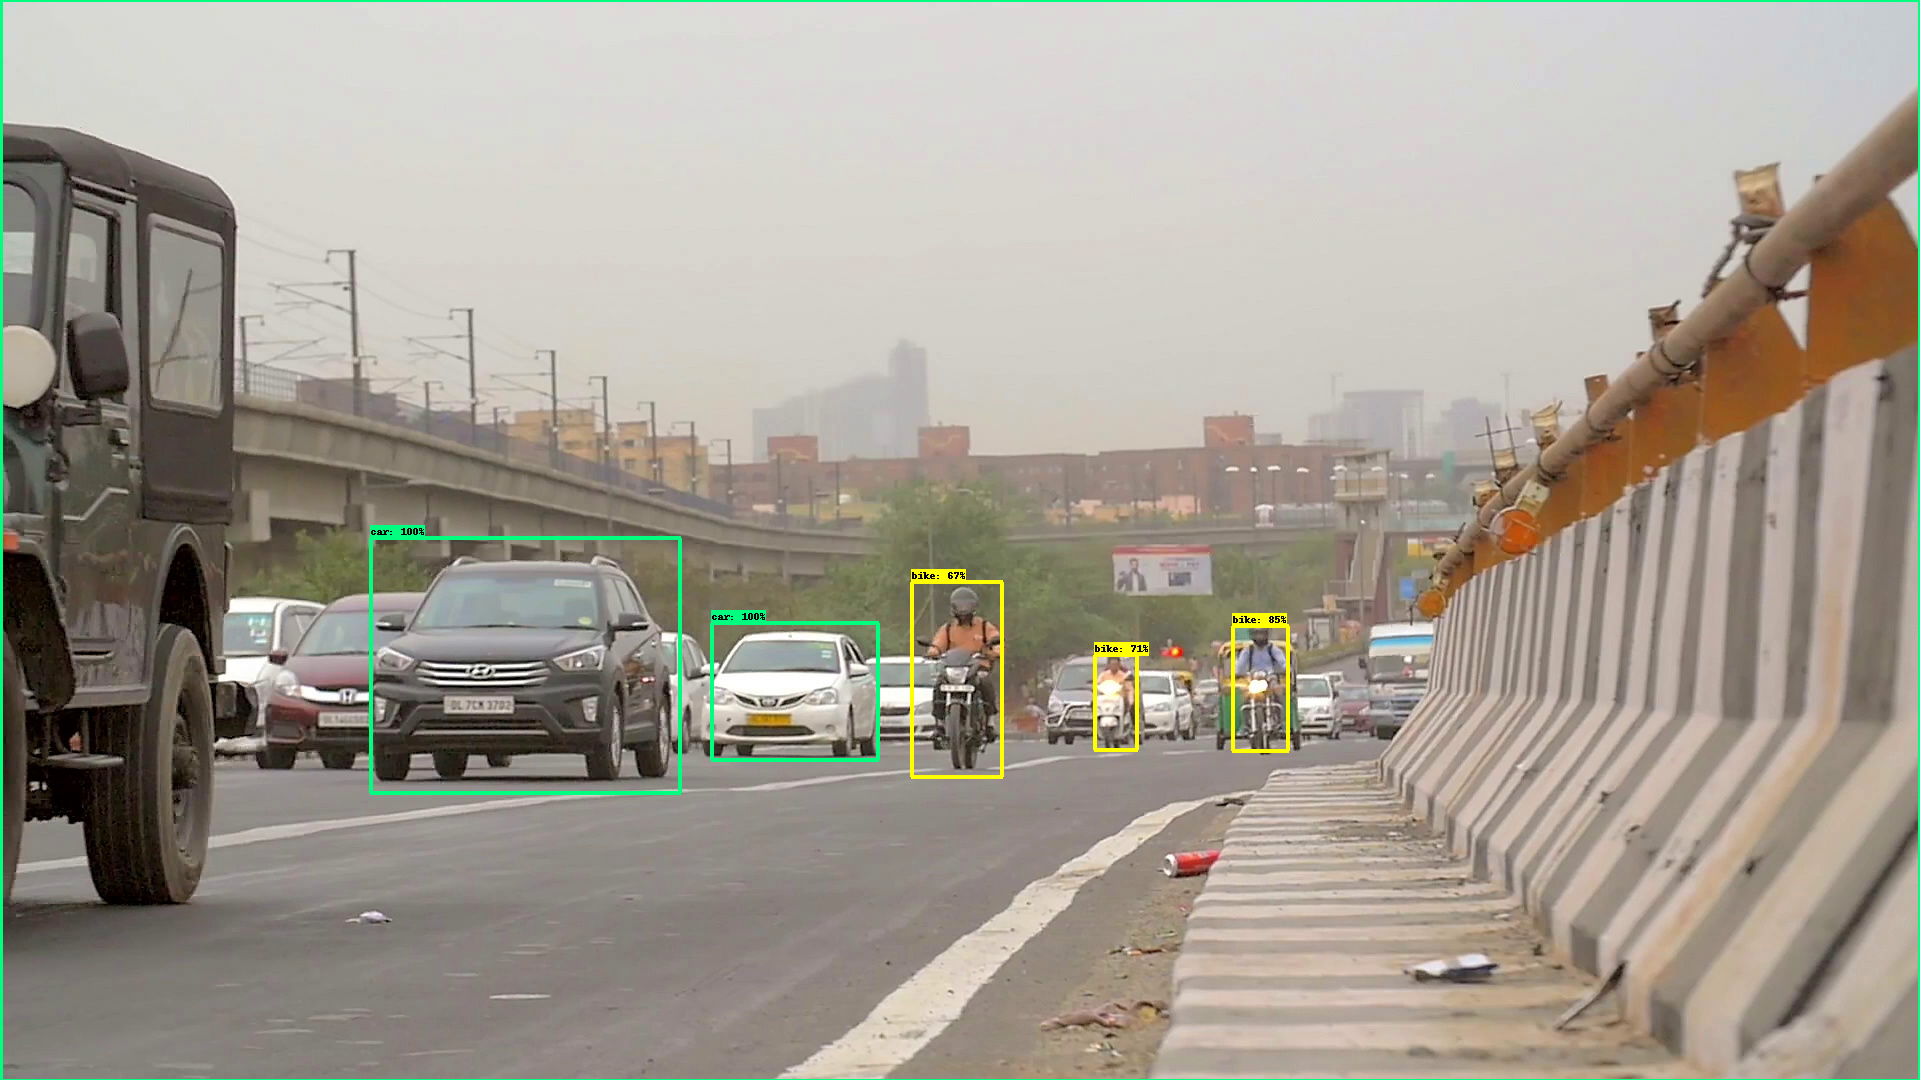

In [57]:
"""
Object Detection (On Image) From TF2 Saved Model
=====================================
"""

import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'    # Suppress TensorFlow logging (1)
import pathlib
import tensorflow as tf
import cv2
import argparse
from google.colab.patches import cv2_imshow

# Enable GPU dynamic memory allocation
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

# PROVIDE PATH TO IMAGE DIRECTORY
IMAGE_PATHS = '/content/training_demo/images/train/image1.jpg'


# PROVIDE PATH TO MODEL DIRECTORY
PATH_TO_MODEL_DIR = '/content/training_demo/exported_models/my_model'

# PROVIDE PATH TO LABEL MAP
PATH_TO_LABELS = '/content/training_demo/annotations/label_map.pbtxt'

# PROVIDE THE MINIMUM CONFIDENCE THRESHOLD
MIN_CONF_THRESH = float(0.60)

# LOAD THE MODEL

import time
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as viz_utils

PATH_TO_SAVED_MODEL = PATH_TO_MODEL_DIR + "/saved_model"

print('Loading model...', end='')
start_time = time.time()

# LOAD SAVED MODEL AND BUILD DETECTION FUNCTION
detect_fn = tf.saved_model.load(PATH_TO_SAVED_MODEL)

end_time = time.time()
elapsed_time = end_time - start_time
print('Done! Took {} seconds'.format(elapsed_time))

# LOAD LABEL MAP DATA FOR PLOTTING

category_index = label_map_util.create_category_index_from_labelmap(PATH_TO_LABELS,
                                                                    use_display_name=True)

import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')   # Suppress Matplotlib warnings

def load_image_into_numpy_array(path):
    """Load an image from file into a numpy array.
    Puts image into numpy array to feed into tensorflow graph.
    Note that by convention we put it into a numpy array with shape
    (height, width, channels), where channels=3 for RGB.
    Args:
      path: the file path to the image
    Returns:
      uint8 numpy array with shape (img_height, img_width, 3)
    """
    return np.array(Image.open(path))




print('Running inference for {}... '.format(IMAGE_PATHS), end='')

image = cv2.imread(IMAGE_PATHS)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image_expanded = np.expand_dims(image_rgb, axis=0)

# The input needs to be a tensor, convert it using `tf.convert_to_tensor`.
input_tensor = tf.convert_to_tensor(image)
# The model expects a batch of images, so add an axis with `tf.newaxis`.
input_tensor = input_tensor[tf.newaxis, ...]

# input_tensor = np.expand_dims(image_np, 0)
detections = detect_fn(input_tensor)

# All outputs are batches tensors.
# Convert to numpy arrays, and take index [0] to remove the batch dimension.
# We're only interested in the first num_detections.
num_detections = int(detections.pop('num_detections'))
detections = {key: value[0, :num_detections].numpy()
               for key, value in detections.items()}
detections['num_detections'] = num_detections

# detection_classes should be ints.
detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

image_with_detections = image.copy()

# SET MIN_SCORE_THRESH BASED ON YOU MINIMUM THRESHOLD FOR DETECTIONS
viz_utils.visualize_boxes_and_labels_on_image_array(
      image_with_detections,
      detections['detection_boxes'],
      detections['detection_classes'],
      detections['detection_scores'],
      category_index,
      use_normalized_coordinates=True,
      max_boxes_to_draw=200,
      min_score_thresh=0.5,
      agnostic_mode=False)

print('Done')
# DISPLAYS OUTPUT IMAGE
cv2_imshow(image_with_detections)
# CLOSES WINDOW ONCE KEY IS PRESSED


## **Evaluating the Model**

https://tensorflow-object-detection-api-tutorial.readthedocs.io/en/latest/training.html#evaluating-the-model-optional

**The steps to run the evaluation are outlined below:**

* **Firstly** we need to *download and install the metrics* we want to use.

For a description of the supported object detection evaluation metrics, see here.

*The process of installing the COCO evaluation metrics is described in </b>[COCO API installation](https://tensorflow-object-detection-api-tutorial.readthedocs.io/en/latest/install.html#tf-models-install-coco)</b>* .

* **Secondly**, we must *modify the configuration pipeline* (*.<b>config script</b>).

See lines 178-179 of the script in **[Configure the Training Pipeline](https://tensorflow-object-detection-api-tutorial.readthedocs.io/en/latest/training.html#training-pipeline-conf)**.

* The **third step** is to actually run the evaluation. To do so, open a new Terminal, **cd** inside the **training_demo** folder and run the following command:

In [ ]:
# python model_main_tf2.py --model_dir=models/my_ssd_resnet50_v1_fpn --pipeline_config_path=models/my_ssd_resnet50_v1_fpn/pipeline.config --checkpoint_dir=models/my_ssd_resnet50_v1_fpn

## **Monitor Training Job Progress using TensorBoard**

https://tensorflow-object-detection-api-tutorial.readthedocs.io/en/latest/training.html#monitor-training-job-progress-using-tensorboard

In [60]:
#activate tensorflow_gpu

In [ ]:
#"cd" into the "training_demo" folder.

In [61]:
pwd

'/content/training_demo'

In [62]:
# run this command

# tensorboard --logdir=models/my_ssd_resnet50_v1_fpn

The above command will start a new TensorBoard server, which (by default) listens to port 6006 of your machine. Assuming that everything went well, you should see a print-out similar to the one below (plus/minus some warnings):

In [ ]:
# ...
# TensorBoard 2.2.2 at http://localhost:6006/ (Press CTRL+C to quit)

Once this is done, go to your browser and type http://localhost:6006/ in your address bar, following which you should be presented with a dashboard similar to the one shown below (maybe less populated if your model has just started training):

<img src="https://tensorflow-object-detection-api-tutorial.readthedocs.io/en/latest/_images/TensorBoard.JPG"/>

# **ENJOY-[Object_Detection_Using_RCNN]**

In [63]:
from google. colab import runtime 
runtime.unassign()

**https://www.youtube.com/watch?v=XoMiveY_1Z4**

### **Thanks to "Krish Naik" for a awesome seesion on you-tube.**